Purpose of Script: Purpose of the script is to predict as to whether a give character of the popular TV show 'Game of Throne' will survive or not, based on several features such as age, title, father, mother, spouse, heir, house, etc.<br>
Analytical Objectives: Analytical objective is to find the best predictive model where AUC is maximized, and other parameters like Train-Test gap and Confusion Matrix are within the pre-defined thresholds.<br>
Accessory: GOT_data_dictionary

Preparation and Exploration of Data: We first import essential libraries. Secondly, the required data 'GOT_character_predictions.xlsx' is imported to jupyter notebook and explored for data cleaning and preparation for analysis.

In [1]:
# importing libraries
import numpy as np                                   # mathematical essentials
import pandas as pd                                  # data science essentials
import matplotlib.pyplot as plt                      # visualization essential
import seaborn as sns                                # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split 
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots

# loading data
file = './GOT_character_predictions.xlsx'
gameot = pd.read_excel(file)


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
gameot.head(n = 5)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


In [2]:
# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {gameot.shape[0]}
Features:     {gameot.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 1946
Features:     25



In [3]:
# Making a copy of the original dataset for use as the working dataframe
gameot_df = pd.DataFrame.copy(gameot)

In [4]:
# checking the first ten rows of the working dataframe
gameot_df.head(n=10)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
5,6,Tommen Baratheon,NaN,NaN,NaN,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,1.000000,1
6,7,Valarr Targaryen,Hand of the King,Valyrian,183.0,NaN,NaN,NaN,House Targaryen,Kiera of Tyrosh,0,0,0,0,0,NaN,NaN,NaN,1.0,1,1,26.0,0,0.431438,0
7,8,Viserys I Targaryen,NaN,NaN,NaN,Alyssa Targaryen,Baelon Targaryen,Rhaenyra Targaryen,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,0.678930,0
8,9,Wilbert,Ser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.006689,0
9,10,Wilbert Osgrey,Ser,NaN,NaN,NaN,NaN,NaN,House Osgrey,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.020067,1


In [5]:
# looping to print column names one by one
for column in gameot_df:
    print(column)

S.No
name
title
culture
dateOfBirth
mother
father
heir
house
spouse
book1_A_Game_Of_Thrones
book2_A_Clash_Of_Kings
book3_A_Storm_Of_Swords
book4_A_Feast_For_Crows
book5_A_Dance_with_Dragons
isAliveMother
isAliveFather
isAliveHeir
isAliveSpouse
isMarried
isNoble
age
numDeadRelations
popularity
isAlive


In [7]:
# Information about each variable
gameot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1946 non-null   int64  
 1   name                        1946 non-null   object 
 2   title                       938 non-null    object 
 3   culture                     677 non-null    object 
 4   dateOfBirth                 433 non-null    float64
 5   mother                      21 non-null     object 
 6   father                      26 non-null     object 
 7   heir                        23 non-null     object 
 8   house                       1519 non-null   object 
 9   spouse                      276 non-null    object 
 10  book1_A_Game_Of_Thrones     1946 non-null   int64  
 11  book2_A_Clash_Of_Kings      1946 non-null   int64  
 12  book3_A_Storm_Of_Swords     1946 non-null   int64  
 13  book4_A_Feast_For_Crows     1946 

The different non-null values for features imply that there are missing values in a number of columns. Let's check for them:

In [8]:
# checking for missing values
gameot_df.isnull().any(axis = 0)

S.No                          False
name                          False
title                          True
culture                        True
dateOfBirth                    True
mother                         True
father                         True
heir                           True
house                          True
spouse                         True
book1_A_Game_Of_Thrones       False
book2_A_Clash_Of_Kings        False
book3_A_Storm_Of_Swords       False
book4_A_Feast_For_Crows       False
book5_A_Dance_with_Dragons    False
isAliveMother                  True
isAliveFather                  True
isAliveHeir                    True
isAliveSpouse                  True
isMarried                     False
isNoble                       False
age                            True
numDeadRelations              False
popularity                    False
isAlive                       False
dtype: bool

In [9]:
# finding the number of missing values
gameot_df.isnull().sum(axis=0)

S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
dtype: int64

Out of 25 columns, 13 columns have missing values. Missing values appear to be disproportionately large. Let us find their proportions:

In [10]:
# finding the number of missing values
gameot_df.isnull().mean(axis=0)

S.No                          0.000000
name                          0.000000
title                         0.517986
culture                       0.652107
dateOfBirth                   0.777492
mother                        0.989209
father                        0.986639
heir                          0.988181
house                         0.219424
spouse                        0.858171
book1_A_Game_Of_Thrones       0.000000
book2_A_Clash_Of_Kings        0.000000
book3_A_Storm_Of_Swords       0.000000
book4_A_Feast_For_Crows       0.000000
book5_A_Dance_with_Dragons    0.000000
isAliveMother                 0.989209
isAliveFather                 0.986639
isAliveHeir                   0.988181
isAliveSpouse                 0.858171
isMarried                     0.000000
isNoble                       0.000000
age                           0.777492
numDeadRelations              0.000000
popularity                    0.000000
isAlive                       0.000000
dtype: float64

It is observed that missing values are disproportionately large. Moreover, these features represent categorical data except in case of age and DOB. Thus, we cannot impute these missing values with mean, median or mode. In case of age also, around 78% of the data is missing. Therefore, imputing such a large number of observations with mean, median or more won't be proper. However, in case of house, it is observed that the character's last name is the same as the house name. For example, Walder Frey belongs to House Frey and Aemma Arryn belongs to House Arryn. Further, the missing values are also relatively smaller at less than 22%. Therefore, either we may impute these missing values with the last names of the characters or create a proxy in the form of surnames of the characters. We should also find the genders of the characters from their first names. Before that, we shall create columns for missing value flags.

In [11]:
# looping to detect features with missing values
for col in gameot_df:

    # creating columns with 1s if missing and 0 if not
    if gameot_df[col].isnull().astype(int).sum() > 0:
        gameot_df['m_'+col] = gameot_df[col].isnull().astype(int)

In [12]:
# checking the missing value flags and datatypes for variables
gameot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1946 non-null   int64  
 1   name                        1946 non-null   object 
 2   title                       938 non-null    object 
 3   culture                     677 non-null    object 
 4   dateOfBirth                 433 non-null    float64
 5   mother                      21 non-null     object 
 6   father                      26 non-null     object 
 7   heir                        23 non-null     object 
 8   house                       1519 non-null   object 
 9   spouse                      276 non-null    object 
 10  book1_A_Game_Of_Thrones     1946 non-null   int64  
 11  book2_A_Clash_Of_Kings      1946 non-null   int64  
 12  book3_A_Storm_Of_Swords     1946 non-null   int64  
 13  book4_A_Feast_For_Crows     1946 

In [13]:
# creating a column surname from name
placeholder=[]
sur_name = gameot_df['name'].str.split(' ')
for x in sur_name:   # using a for loop
    s_n=''.join(x[-1])
    placeholder.append(s_n)
gameot_df['surname'] = pd.Series(placeholder)
gameot_df.info() # checking

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1946 non-null   int64  
 1   name                        1946 non-null   object 
 2   title                       938 non-null    object 
 3   culture                     677 non-null    object 
 4   dateOfBirth                 433 non-null    float64
 5   mother                      21 non-null     object 
 6   father                      26 non-null     object 
 7   heir                        23 non-null     object 
 8   house                       1519 non-null   object 
 9   spouse                      276 non-null    object 
 10  book1_A_Game_Of_Thrones     1946 non-null   int64  
 11  book2_A_Clash_Of_Kings      1946 non-null   int64  
 12  book3_A_Storm_Of_Swords     1946 non-null   int64  
 13  book4_A_Feast_For_Crows     1946 

As per the GOT_data_directory, there should be a categorical feature called male (male = 0, female =1). However, the same is missing. Therefore, we may create a feature gender based on the first names of the characters. We shall use gender_guessor for this purpose.

In [14]:
# importing libraries
import random as rand # random number generation
import pandas as pd   # data science essentials

import gender_guesser.detector as gender # guess gender based on (given) name

# setting random seed
rand.seed(a = 327)

In [15]:
# creating a copy of the column 'name'
gameot_df['name_1'] = pd.DataFrame.copy(gameot_df['name'])
gameot_df.head() # checking for new column

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,m_title,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,m_age,surname,name_1
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0,1,1,1,0,0,0,1,1,0,0,0,1,1,Targaryen,Viserys II Targaryen
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,0,0,0,1,1,1,0,0,1,1,1,0,0,Frey,Walder Frey
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1,0,1,1,1,1,1,0,1,1,1,1,1,1,Hill,Addison Hill
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,0,1,0,1,1,1,0,0,1,1,1,0,0,Arryn,Aemma Arryn
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,0,0,0,1,1,1,0,0,1,1,1,0,0,Santagar,Sylva Santagar


We shall split the observations in the newly created column 'name' into first name and rest. First name can be used for predicting the gender of the characters.

In [16]:
# creating a placeholder list
placeholder_lst = []

# looping over each name
for index, col in gameot_df.iterrows():
    
    # splitting name_1 between first name and rest
    split_name = gameot_df.loc[index, 'name_1'].split(maxsplit=1)
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_name)
    

# converting placeholder_lst into a DataFrame 
name1_df = pd.DataFrame(placeholder_lst)


# displaying the results
name1_df

,0,1
0,Viserys,II Targaryen
1,Walder,Frey
2,Addison,Hill
3,Aemma,Arryn
4,Sylva,Santagar
...,...,...
1941,Luwin,None
1942,Reek,None
1943,Symeon,Star-Eyes
1944,Coldhands,None


In [17]:
# renaming columns of name1_df
name1_df.columns = ['first_name' , 'other_name']

In [18]:
# guessing gender based on first name

# placeholder list
placeholder_lst_2 = []


# looping to guess gender
for name in name1_df['first_name']:
    guess = gender.Detector().get_gender(name)
    print(guess)
    placeholder_lst_2.append(guess)


# converting list into a series
gameot_df['gender_guess'] = pd.Series(placeholder_lst_2)


# checking results
gameot_df.head(n = 5)

unknown
unknown
andy
unknown
female
unknown
unknown
unknown
male
male
mostly_male
mostly_male
mostly_male
mostly_male
mostly_male
mostly_male
unknown
male
unknown
unknown
male
male
female
unknown
unknown
female
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
mostly_female
unknown
unknown
unknown
unknown
unknown
female
unknown
unknown
male
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
male
unknown
unknown
unknown
unknown
unknown
unknown
female
unknown
unknown
unknown
male
male
andy
andy
unknown
andy
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
female
male
male
unknown
male
male
male
male
male
male
male
mostly_male
male
mostly_male
mostly_male
unknown
unknown
unknown
male
unknown
male
unknown
male
unknown
male
unknown
unknown
male
unknown
unknown
unknown
unknown
unknown
unknown
female
unknown
mostly_male
unknown
unknown
male


unknown
unknown
unknown
unknown
unknown
unknown
unknown
male
unknown
male
unknown
unknown
unknown
unknown
unknown
male
unknown
unknown
unknown
female
unknown
male
male
male
male
unknown
unknown
unknown
unknown
unknown
unknown
unknown
male
male
male
male
male
male
male
male
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
female
unknown
unknown
unknown
unknown
unknown
unknown
unknown
female
female
male
unknown
unknown
unknown
unknown
unknown
unknown
male
male
female
unknown
female
male
unknown
unknown
unknown
unknown
unknown
unknown
male
male
male
unknown
unknown
unknown
unknown
unknown
unknown
unknown
male
unknown
male
unknown
unknown
male
unknown
female
unknown
unknown
unknown
mostly_male
male
unknown
unknown
male
male
male
unknown
female
unknown
unknown
unknown
unknown
female
unknown
female
female
female
male
male
unknown
unknown
unknown
male
male
unknown
male
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
female
unknown

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,m_title,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,m_age,surname,name_1,gender_guess
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0,1,1,1,0,0,0,1,1,0,0,0,1,1,Targaryen,Viserys II Targaryen,unknown
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,0,0,0,1,1,1,0,0,1,1,1,0,0,Frey,Walder Frey,unknown
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1,0,1,1,1,1,1,0,1,1,1,1,1,1,Hill,Addison Hill,andy
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,0,1,0,1,1,1,0,0,1,1,1,0,0,Arryn,Aemma Arryn,unknown
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,0,0,0,1,1,1,0,0,1,1,1,0,0,Santagar,Sylva Santagar,female


Imputing Missing Value: We shall now impute missing values. In case of categorical data, we shall use 'unknown' and in case of numerical data. we shall use -1000. We should also convert the features with data type 'object' into data type 'category' for faster processing in ML programmes. (source: Data Camp - School Budgeting with Machine Learning in Python)

In [19]:
# imputing the missing values with string 'unknown'
# filling date of birth and age with median (should be -1000 as per datacamp)
gameot_df['title'].fillna(value = 'unknown',
                         inplace = True)
gameot_df['culture'].fillna(value = 'unknown',
                         inplace = True)
gameot_df['dateOfBirth'].fillna(value = -1000,
                         inplace = True)
gameot_df['mother'].fillna(value = 'unknown',
                         inplace = True)
gameot_df['father'].fillna(value = 'unknown',
                         inplace = True)
gameot_df['heir'].fillna(value = 'unknown',
                         inplace = True)
gameot_df['house'].fillna(value = 'unknown',
                         inplace = True)
gameot_df['spouse'].fillna(value = 'unknown',
                         inplace = True)
gameot_df['isAliveMother'].fillna(value = -1000,
                         inplace = True)
gameot_df['isAliveFather'].fillna(value = -1000,
                         inplace = True)
gameot_df['isAliveHeir'].fillna(value = -1000,
                         inplace = True)
gameot_df['isAliveSpouse'].fillna(value = -1000,
                         inplace = True)
gameot_df['age'].fillna(value = -1000,
                         inplace = True)

In [20]:
# checking for missing values after imputing
gameot_df.isnull().any(axis=0)

S.No                          False
name                          False
title                         False
culture                       False
dateOfBirth                   False
mother                        False
father                        False
heir                          False
house                         False
spouse                        False
book1_A_Game_Of_Thrones       False
book2_A_Clash_Of_Kings        False
book3_A_Storm_Of_Swords       False
book4_A_Feast_For_Crows       False
book5_A_Dance_with_Dragons    False
isAliveMother                 False
isAliveFather                 False
isAliveHeir                   False
isAliveSpouse                 False
isMarried                     False
isNoble                       False
age                           False
numDeadRelations              False
popularity                    False
isAlive                       False
m_title                       False
m_culture                     False
m_dateOfBirth               

In [21]:
# ensuring the no. of non-null observations are 1946 in each column
gameot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1946 non-null   int64  
 1   name                        1946 non-null   object 
 2   title                       1946 non-null   object 
 3   culture                     1946 non-null   object 
 4   dateOfBirth                 1946 non-null   float64
 5   mother                      1946 non-null   object 
 6   father                      1946 non-null   object 
 7   heir                        1946 non-null   object 
 8   house                       1946 non-null   object 
 9   spouse                      1946 non-null   object 
 10  book1_A_Game_Of_Thrones     1946 non-null   int64  
 11  book2_A_Clash_Of_Kings      1946 non-null   int64  
 12  book3_A_Storm_Of_Swords     1946 non-null   int64  
 13  book4_A_Feast_For_Crows     1946 

In [22]:
# converting data with object types into category types
gameot_df.name = gameot_df.name.astype('category')
gameot_df.title = gameot_df.title.astype('category')
gameot_df.culture = gameot_df.culture.astype('category')
gameot_df.mother = gameot_df.mother.astype('category')
gameot_df.father = gameot_df.father.astype('category')
gameot_df.heir = gameot_df.heir.astype('category')
gameot_df.house = gameot_df.house.astype('category')
gameot_df.spouse = gameot_df.spouse.astype('category')
gameot_df.gender_guess = gameot_df.gender_guess.astype('category')
gameot_df.surname = gameot_df.surname.astype('category')
gameot_df.name_1 = gameot_df.name_1.astype('category')

#checking conversion
gameot_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   S.No                        1946 non-null   int64   
 1   name                        1946 non-null   category
 2   title                       1946 non-null   category
 3   culture                     1946 non-null   category
 4   dateOfBirth                 1946 non-null   float64 
 5   mother                      1946 non-null   category
 6   father                      1946 non-null   category
 7   heir                        1946 non-null   category
 8   house                       1946 non-null   category
 9   spouse                      1946 non-null   category
 10  book1_A_Game_Of_Thrones     1946 non-null   int64   
 11  book2_A_Clash_Of_Kings      1946 non-null   int64   
 12  book3_A_Storm_Of_Swords     1946 non-null   int64   
 13  book4_A_Feast_For_

In [23]:
# creating dummy variables for categorical features 
# dropping the default dummy for each set of dummy variables

gameot_df = pd.get_dummies(gameot_df, columns=['title', 'culture', 'mother', 
                                               'father','heir', 'spouse', 'isAliveMother', 
                                               'isAliveFather','isAliveHeir',
                                               'isAliveSpouse', 'surname', 
                                               'gender_guess'],drop_first = True)


In [24]:
# checking the dataframe
gameot_df.head()

,S.No,name,dateOfBirth,house,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,m_title,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,m_age,name_1,title_Andals,title_Arbor,title_Archmaester,title_Ashford,title_Banefort,title_Barrowton,title_Bear Island,title_Big BucketThe Wull,title_Bitterbridge,title_Black Wind,title_Blackcrown,title_Blackmont,title_Blacktyde,title_Bloodrider,title_Blue Grace,title_Brightwater,title_Broad Arch,title_Brother,title_BrotherProctor,title_Captain,title_Captain of the guard,title_Captain-General,title_Castellan,title_Castellan of Harrenhal,title_CastellanCommander,title_Casterly Rock,title_Castle Lychester,title_Cerwyn,title_Chief Undergaoler,title_Claw Isle,title_Cobblecat,title_Coldmoat,title_Coldwater Burn,title_Commander of the City Watch,title_Commander of the Second Sons,title_Crag,title_Crakehall,title_Cupbearer,title_Darry,title_Deepwood Motte,title_Dragonstone,title_Dreadfort,title_Duskendale,title_Dyre Den,title_Eastwatch-by-the-Sea,title_Eyrie,title_Fair Isle,title_Feastfires,title_Felwood,title_First Builder,title_First Ranger,title_First Sword of Braavos,title_Foamdrinker,title_Ghost Hill,title_Godsgrace,title_Godswife,title_Golden Storm,title_Golden Tooth,title_Goldengrove,title_Goldgrass,title_Good Master,title_Goodman,title_Goodwife,title_Grand Maester,title_Grassy Vale,title_Green Grace,title_Greenshield,title_Greenstone,title_Grey Glen,title_Greywater Watch,title_Gulltown,title_Hand of the King,title_Harlaw,title_Harrenhal,title_Harridan Hill,title_Hayford,title_Haystack Hall,title_Heart's Home,title_High Septon,title_High Steward of Highgarden,title_Highgarden,title_Hightower,title_Horn Hill,title_Hornvale,title_Hornwood,title_Iron Islands,title_Ironoaks,title_Karhold,title_Karl's Hold,title_Kayce,title_Keeper of the Gates of the Moon,title_Khal,title_KhalKo (formerly),title_Khalakka,title_King,title_King in the North,title_King of Astapor,title_King of Winter,title_King of the Andals,title_King of the Iron Islands,title_King-Beyond-the-Wall,title_Knight,title_Knight of Griffin's Roost,title_Lady,title_Lady Marya,title_Lady of Bear Island,title_Lady of Darry,title_Lady of Torrhen's Square,title_Lady of the Leaves,title_Lady of the Vale,title_LadyQueen,title_LadyQueenDowager Queen,title_Last Hearth,title_Light of the West,title_Lonely Light,title_Longbow Hall,title_Longsister,title_Longtable,title_Lord,title_Lord Captain of the Iron Fleet,title_Lord Commander of the Night's Watch,title_Lord Paramount of the Mander,title_Lord Paramount of the Stormlands,title_Lord Paramount of the Trident,title_Lord Reaper of Pyke,title_Lord Seneschal,title_Lord Steward,title_Lord Steward of the Iron Islands,title_Lord of Atranta,title_Lord of Blackhaven,title_Lord of Coldmoat,title_Lord of Crows Nest,title_Lord of Darry,title_Lord of Dragonstone,title_Lord of Flint's Finger,title_Lord of Greyshield,title_Lord of Griffin's Roost,title_Lord of Hammerhorn,title_Lord of Harrenhal,title_Lord of Hellholt,title_Lord of Honeyholt,title_Lord of Iron Holt,title_Lord of Kingsgrave,title_Lord of Oakenshield,title_Lord of Oldcastle,title_Lord of Pebbleton,title_Lord of Southshield,title_Lord of Starfall,title_Lord of Sunflower Hall,title_Lord of White Harbor,title_Lord of the Crossing,title_Lord of the Deep Den,title_Lord of the Hornwood,title_Lord of the Iron Islands,title_Lord of the Marches,title_Lord of the Red Dunes,title_Lord of the Seven Kingdoms,title_Lord of the Snakewood,title_Lord of the Ten TowersLord Harlaw of HarlawHarlaw of Harlaw,title_Lord of the Tides,title_Lord of the Tor,title_LordWisdom,title_Lordsport,title_Maester,title_Magister,title_Magister of Pentos,title_Magnar of Thenn,title_Maidenpool,title_Master of Coin,title_Master of Deepwood Motte,title_Master of Harlaw Hall,title_Mast

In [25]:
# Pre-defined functions
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [26]:
# checking no. of rows and columns in the dataframe
gameot_df.shape

(1946, 1790)

In [27]:
# checking proportion of 0 and 1 in 'isAlive'
gameot_df.loc[ : ,'isAlive'].value_counts(normalize = True).round(decimals = 2)

1    0.75
0    0.25
Name: isAlive, dtype: float64

1 and 0 are not in equal proportions in the target variable 'isAlive'. We shall maintain their proportion of 75% and 25% respectively by stratifying, while dividing the data in training and testing sets. We shall also drop one of the dummy variables of the five books where the names of the characters appear. Since, name_1 and surname represent the first names and last names contained in the 'name' variable, we may drop also 'name' in our analysis.

In [28]:
# declaring explanatory variables
gameot_data = gameot_df.drop(['isAlive', 'name', 'book1_A_Game_Of_Thrones'],  axis = 1)


# declaring response variable
gameot_target = gameot_df.loc[ : , 'isAlive']

In [29]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            gameot_data,
            gameot_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = gameot_target) # preserving balance


# merging training data for statsmodels
gameot_train = pd.concat([x_train, y_train], axis = 1)

In [30]:
# showing the proportions of 1 and 0 in the response variable of Training and Testing sets
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")



Response Variable Proportions (Training Set)
--------------------------------------------
1    0.75
0    0.25
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.74
0    0.26
Name: isAlive, dtype: float64



The proportions of '1' and '0' are almost equal in the Training and Testing sets. 

In [31]:
# checking correlation of 'isAlive' with explanatory features in the data frame
df_corr = gameot_df.corr().round(2)

df_corr['isAlive'].sort_values(ascending=False)

isAlive                    1.00
book4_A_Feast_For_Crows    0.27
m_age                      0.15
m_dateOfBirth              0.15
m_mother                   0.14
                           ... 
book1_A_Game_Of_Thrones   -0.15
popularity                -0.18
numDeadRelations          -0.19
culture_Valyrian          -0.21
surname_Targaryen         -0.23
Name: isAlive, Length: 1787, dtype: float64

In [ ]:
# instantiating a logistic regression model object and carrying out logistic regression 
# on target 'isAlive' with the x-variable having the highest correlations
logistic_small = smf.logit(formula = """isAlive ~ book4_A_Feast_For_Crows""",
                           data    = gameot_train)


# fitting the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

In [ ]:
# creating a loop for explanatory varaibles with + sign
for val in gameot_data:
    print(f" {val} + ")

In [ ]:
# instantiating a logistic regression model object with a larger set of explanatory variables
logistic_full = smf.logit(formula = """  isAlive ~
                                         book4_A_Feast_For_Crows +
                                         popularity +
                                         numDeadRelations +
                                         culture_Valyrian +
                                         surname_Targaryen """,
                                         data    = gameot_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

In [ ]:
# removing variable 'numdeadRelations' having high p value
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """  isAlive ~
                                         book4_A_Feast_For_Crows +
                                         popularity +
                                         culture_Valyrian +
                                         surname_Targaryen """,
                                         data    = gameot_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Now, we are getting a logistic regression with explanatory variables having significant p-values. However, the Pseudo R-squared is low and AIC and BIC are very high. Now, we shall create a set of these significant explanatory variables.

In [32]:
cand_dict = {
    # significant variables used in logistic regression above
    'logistic_sign'  : ['book4_A_Feast_For_Crows', 'popularity',
                                         'culture_Valyrian', 'surname_Targaryen']}

# train/test split with the full model
gameot_data   =  gameot_df.loc[ : , cand_dict['logistic_sign']]
gameot_target =  gameot_df.loc[ : , 'isAlive']


# spliting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
            gameot_data,
            gameot_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = gameot_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('LogReg Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4)   # accuracy


# displaying and saving the gap between training and testing
print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

LogReg Training ACCURACY: 0.767
LogReg Testing  ACCURACY: 0.7897
LogReg Train-Test Gap   : 0.0227


In [33]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.6031


In [34]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 11  39]
 [  2 143]]


In [35]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 11
False Positives: 39
False Negatives: 2
True Positives : 143



Now, we have encouraging results in logistic regression, where the train-test gap is 2.27% and AUC is 60.31%. Confusion Matrix also shows 143 True Positives and only 2 False Negatives. Now, we shall try Decision Tree Classifier Model.

In [36]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [37]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy

# displaying and saving the gap between training and testing
print('Full Tree Train-Test Gap   :', abs(full_tree_train_score - full_tree_test_score).round(4))
full_tree_test_gap = abs(full_tree_train_score - full_tree_test_score).round(4)

# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.823
Full Tree Testing ACCURACY : 0.8051
Full Tree AUC Score: 0.7117
Full Tree Train-Test Gap   : 0.0179


In [38]:
# unpacking the confusion matrix
dt_tn, \
dt_fp, \
dt_fn, \
dt_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {dt_tn}
False Positives: {dt_fp}
False Negatives: {dt_fn}
True Positives : {dt_tp}
""")


True Negatives : 26
False Positives: 24
False Negatives: 14
True Positives : 131



In the Full Tree model, we got better result of AUC of 71.2% and Train-test gap of 1.79%. Now, we shall use Random Forest Classifier Model.

In [107]:
# user defined functions
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('./analysis_images/Feature_Importance.png')

In [39]:
# Importing libraries for Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm


In [40]:
# INSTANTIATING a random forest model with default values except no.of sample leaves = 7
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = 7,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [53]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Random Forest Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Random Forest Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))

# saving scoring data for future use
RF_train_accuracy = rf_default_fit.score(x_train, y_train).round(4) # accuracy
RF_test_accuracy  = rf_default_fit.score(x_test, y_test).round(4)   # accuracy


# displaying and saving the gap between training and testing
print('Random Forest Train-Test Gap   :', abs(RF_train_accuracy - RF_test_accuracy).round(4))
RF_test_gap = abs(RF_train_accuracy - RF_test_accuracy).round(4)

# printing and saving AUC score
print('Random Forest AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))
RF_AUC_Score = roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4)

Random Forest Training ACCURACY: 0.7995
Random Forest Testing  ACCURACY: 0.8462
Random Forest Train-Test Gap   : 0.0467
Random Forest AUC Score        : 0.7328


Now, we have a better model. The AUC has increased to 73.28% and the train-test gap is 4.67%, within a threhold of 5%. Now, we shall find the most important features and Confusion matrix for this model.

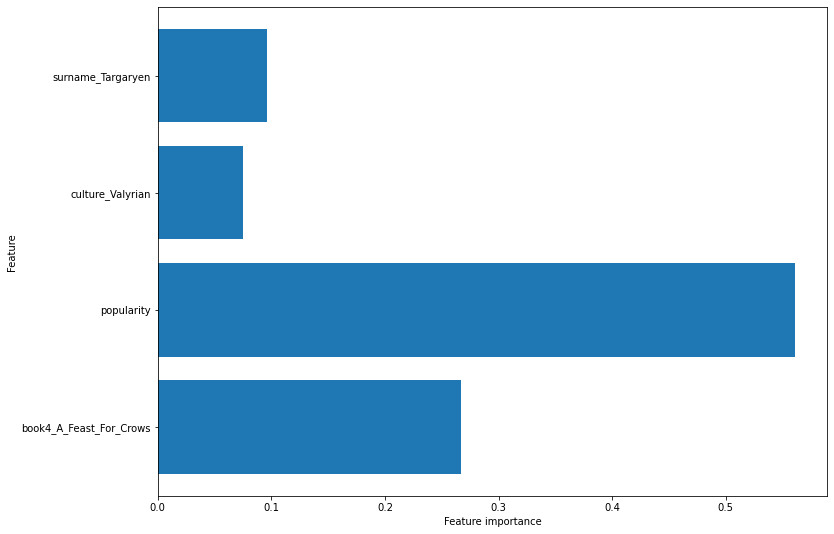

In [54]:
# plotting feature importances
plot_feature_importances(rf_default_fit,
                         train = x_train,
                         export = False)

In [55]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 25
False Positives: 25
False Negatives: 5
True Positives : 140



In [59]:
# comparing results

print(f"""
Model         Train Score   Test Score   Train-Test Gap  AUC
-----         -----------   ----------   --------------  ---
Logistic      {logreg_train_score}         {logreg_train_score}         {logreg_test_gap}        {logreg_auc_score}
Decision Tree {full_tree_train_score}         {full_tree_test_score}        {full_tree_test_gap}        {full_tree_auc_score}
Random Forest {RF_train_accuracy}        {RF_test_accuracy}        {RF_test_gap}        {RF_AUC_Score}
""")


# creating Confusion Matrix for the models
print(f"""
Confusion Matrix    Logistics   Decision Tree  Random Forest
---------------     ---------   -------------  -------------
True Positives:     {logreg_tp}           {dt_tp}          {rf_tp}
False Positives:    {logreg_fp}            {dt_fp}           {rf_fp}
True Negatives:     {logreg_tn}            {dt_tn}           {rf_tn}
False Negatives:    {logreg_fn}             {dt_fn}           {rf_fn}
""")
print("""Conclusion: Based on AUC score, Random Forest is my best model.""")


Model         Train Score   Test Score   Train-Test Gap  AUC
-----         -----------   ----------   --------------  ---
Logistic      0.767         0.767         0.0227        0.6031
Decision Tree 0.823         0.8051        0.0179        0.7117
Random Forest 0.7995        0.8462        0.0467        0.7328


Confusion Matrix    Logistics   Decision Tree  Random Forest
---------------     ---------   -------------  -------------
True Positives:     143           131          140
False Positives:    39            24           25
True Negatives:     11            26           25
False Negatives:    2             14           5

Conclusion: Based on AUC score, Random Forest is my best model.
